In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn

import warnings
warnings.filterwarnings('ignore')

In [ ]:
#найти и скачать многомерные данные для классификации
data = pd.read_csv("ph-data.xls")
print(data.shape)
data.head()

(653, 4)


,blue,green,red,label
0,36,27,231,0
1,36,84,250,1
2,37,164,255,2
3,22,205,255,3
4,38,223,221,4


In [ ]:
#предобработать, проверить выбросы, пропуски, есть ли дисбаланс классов и прочее
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 653 entries, 0 to 652
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   blue    653 non-null    int64
 1   green   653 non-null    int64
 2   red     653 non-null    int64
 3   label   653 non-null    int64
dtypes: int64(4)
memory usage: 20.5 KB


In [ ]:
# data.drop('RespId', axis = 1, inplace = True)

In [ ]:
data.isna().sum()

blue     0
green    0
red      0
label    0
dtype: int64

In [ ]:
categorical_cols = data.select_dtypes(include=["object"]).columns.tolist()
print(len(categorical_cols))
categorical_cols

0


[]

In [ ]:
#посмотрим, какое количество уникальных значений имеют категориальные признаки и числовые
unic_categ = pd.DataFrame([[i,data[i].nunique()] for i in categorical_cols], columns=['column_name','num_unique']).sort_values(by=['num_unique'])
unic_categ

,column_name,num_unique


In [ ]:
numeric_cols = data.select_dtypes(exclude=["object"]).columns.tolist()
print(len(numeric_cols))
numeric_cols

4


['blue', 'green', 'red', 'label']

In [ ]:
unic_numer = pd.DataFrame([[i,data[i].nunique()] for i in numeric_cols], columns=['column_name','num_unique']).sort_values(by=['num_unique'])
unic_numer

,column_name,num_unique
3,label,15
0,blue,165
2,red,172
1,green,186


In [ ]:
data.label.value_counts()

label
1     44
2     44
3     44
4     44
5     44
6     44
7     44
8     44
9     44
10    44
11    44
12    44
14    44
13    43
0     38
Name: count, dtype: int64

In [ ]:
target_names = data.label.unique()
target_names

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [ ]:
target_name = 'label'
numeric_cols.remove(target_name)

In [ ]:
from sklearn.model_selection import train_test_split
#разделить на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(target_name, axis=1),
    data[target_name],
    test_size=0.3,
    random_state=1,
    shuffle=True
)


In [ ]:
# from sklearn.preprocessing import OrdinalEncoder

# encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

# X_train = encoder.fit_transform(X_train).astype(int)
# X_test = encoder.fit_transform(X_test).astype(int)

# y_train = y_train.values.reshape(-1,1)
# y_train = encoder.fit_transform(y_train).astype(int)
# y_train
# y_test = y_test.values.reshape(-1,1)
# y_test = encoder.fit_transform(y_test).astype(int)
# X_train

In [ ]:
#сделаем одну выборку с нормализованными численными признаками
from sklearn.preprocessing import StandardScaler

X_train_num = X_train[numeric_cols]
X_test_num = X_test[numeric_cols]

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_num)
X_test = scaler.transform(X_test_num)

# Логистическая регрессия

In [ ]:
from sklearn.linear_model import LogisticRegression
#обучить логистическую регрессию

# instantiate the model (using the default parameters)
model = LogisticRegression(random_state=1, multi_class='multinomial', class_weight='balanced')

# fit the model with data
model.fit(X_train, y_train)


y_pred = model.predict(X_test)



[[12  0  0  0  0  0  0  0  0  0  0  0  0  0  1]
 [ 1  4  8  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  4  4  9  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  1  0  8  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  3  4  4  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  7 11  0  0  0  0  0  0  0  0]
 [ 0  0  0  2  0  3  5  2  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  2  7  2  0  0  0  0  0  0]
 [ 0  0  0  0  2  0  0  0  6  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0 11  0  0  0  0  1]
 [ 0  0  0  0  0  0  0  0  2  0 14  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  1  0  2 11  0  0  1]
 [ 0  0  0  0  0  0  0  0  0  0  1  0  7  1  1]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  5  5  3]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  1  2  9]]


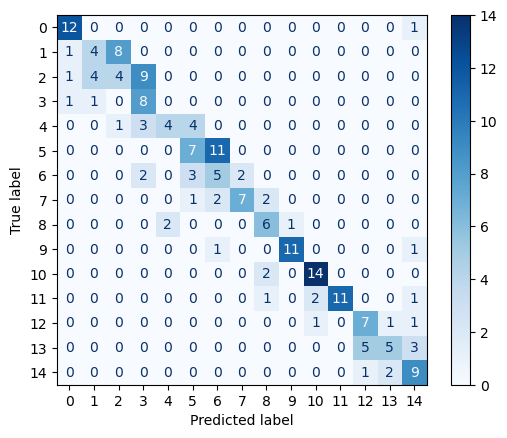

In [ ]:

from sklearn.metrics import ConfusionMatrixDisplay

# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix



disp = ConfusionMatrixDisplay.from_estimator(
        model,
        X_test,
        y_test,
        display_labels=target_names,
        cmap=plt.cm.Blues)

print(disp.confusion_matrix)

plt.show()

In [ ]:
#вывести метрики accuracy, f1-score, PR и ROC кривые, PR и ROC AUC, матрицу ошибок
#может пригодиться from sklearn.metrics import classification_report

from sklearn.metrics import classification_report

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc


from sklearn.preprocessing import label_binarize

print(classification_report(y_test, y_pred))
# для построения кривых можно воспользоваться from sklearn.preprocessing import label_binarize
# для построения кривых необходимо использовать метки тергета 0 и 1 в качестве первого аргумента
# и вероятности попадания в класс, можно получить, используя predict_proba

              precision    recall  f1-score   support

           0       0.80      0.92      0.86        13
           1       0.44      0.31      0.36        13
           2       0.31      0.22      0.26        18
           3       0.36      0.80      0.50        10
           4       0.67      0.33      0.44        12
           5       0.47      0.39      0.42        18
           6       0.26      0.42      0.32        12
           7       0.78      0.58      0.67        12
           8       0.55      0.67      0.60         9
           9       0.92      0.85      0.88        13
          10       0.82      0.88      0.85        16
          11       1.00      0.73      0.85        15
          12       0.54      0.70      0.61        10
          13       0.62      0.38      0.48        13
          14       0.56      0.75      0.64        12

    accuracy                           0.58       196
   macro avg       0.61      0.60      0.58       196
weighted avg       0.61   

classification_report

Support: количество наблюдений для каждого класса

Подходы к усреднению метрик

micro = accuracy (сумма верных срабатываний для всех классов, деленная на все объекты)

Macro avg: среднее арифметическое показателя между классами

weighted avg: средневзвешенное значение рассчитывается путем произведения оценки показателя каждого класса на его количество наблюдений, последующее суммирование результата и деление результата на сумму наблюдений

Зачем?

* Удобно, когда классов очень много
* micro - когда классы сбалансированы
* macro - каждому классу даем одинаковый вес, вне зависимости от дисбаланса классов, хорошо использовать, если нам важен меньший класс, например, мошеннические транзакции, которых мало, а хороших транзакций много, при плохой модели мы получим низкую macro метрику
* weighted - учитываем размер каждого класса, даем класса вес, согласно их количеству. Если меньший класс нам не важен, то мы можем им принебречь при подсчете метрики. Если macro сильно среагирует на ошибки на малом классе, то weighted нет.


In [ ]:
# y_train_bin = label_binarize(y_train, classes=target_names)


# f1 = []
# for j in range(len(target_names)):
#   precision, recall, porog = precision_recall_curve(y_train_bin[:,j],model.predict_proba(X_train)[:,j])
#   f1.append([])
#   for i in range(len(pr)):
#     f1[j].append(2*(pr[i]*rec[i])/(pr[i]+rec[i]))
# f1.append(porog)
# f1
# auc_precision_recall = auc(recall, precision)
# print('AUC PR: ',auc_precision_recall)

In [ ]:
# plt.plot(recall, precision)

# plt.xlabel('Recall')
# plt.ylabel('Precision')
# plt.title('Binary class Precision-Recall curve')
# plt.show()

AUC PR:  0.6886982429373194


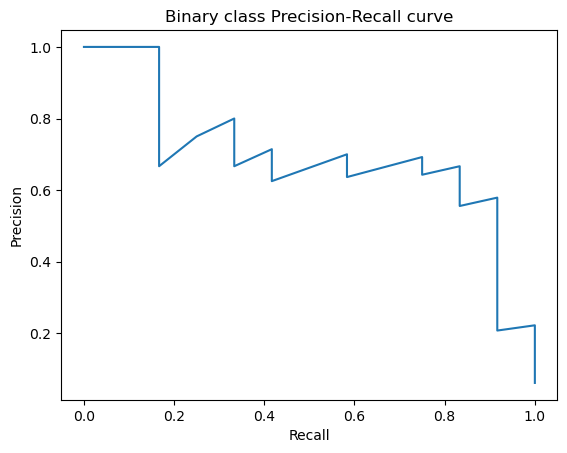

In [ ]:
y_test_bin = label_binarize(y_test, classes=target_names)
f1 = []
for j in range(len(target_names)):
  precision, recall, porog = precision_recall_curve(y_test_bin[:,j],model.predict_proba(X_test)[:,j])
  f1.append([])
  for i in range(len(precision)):
    f1[j].append(2*(precision[i]*recall[i])/(precision[i]+recall[i]))
f1.append(porog)
f1
auc_precision_recall = auc(recall, precision)
print('AUC PR: ',auc_precision_recall)
plt.plot(recall, precision)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Binary class Precision-Recall curve')
plt.show()

In [ ]:
# y_train_bin = label_binarize(y_train, classes=target_names)
# g_mean = []
# for j in range(len(target_names)):
#   fpr, tpr, thresholds = roc_curve(y_test_bin[:,j],model.predict_proba(X_test)[:,j])
#   g_mean.append([])
#   for i in range(len(fpr)):
#     g_mean[j].append((tpr*(1-fpr))**0.5)
# g_mean.append(thresholds)
# g_mean
# auc_roc = auc(fpr, tpr)
# print('AUC ROC: ',auc_roc)
# plt.plot(fpr, tpr)

# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Binary class ROC Curve')
# plt.show()

In [ ]:
# plt.plot(fpr, tpr)

# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Binary class ROC Curve')
# plt.show()

AUC ROC:  0.9669384057971014


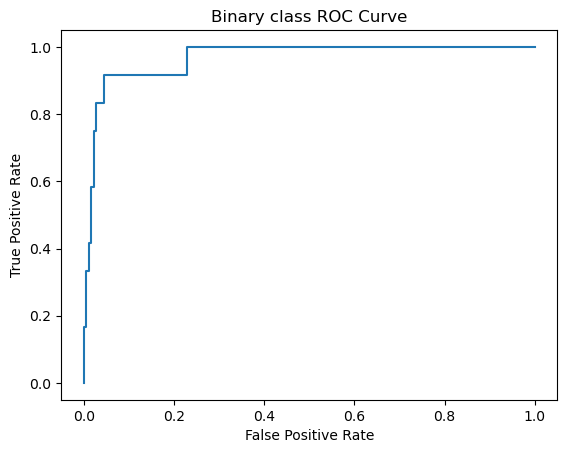

In [ ]:
y_test_bin = label_binarize(y_test, classes=target_names)
g_mean = []
for j in range(len(target_names)):
  fpr, tpr, thresholds = roc_curve(y_test_bin[:,j],model.predict_proba(X_test)[:,j])
  g_mean.append([])
  for i in range(len(fpr)):
    g_mean[j].append((tpr*(1-fpr))**0.5)
g_mean.append(thresholds)
g_mean
auc_roc = auc(fpr, tpr)
print('AUC ROC: ',auc_roc)
plt.plot(fpr, tpr)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Binary class ROC Curve')
plt.show()

# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV



model = KNeighborsClassifier()





In [ ]:
# использовать алгоритм KNN из sklearn

In [ ]:
number_of_neighbors = np.arange(2, 31) #количество соседей для перебора
#инициализировать модель
#использовать GridSearchCV для поиска оптимального гиперпараметра
grid_search = GridSearchCV(model, dict(n_neighbors=number_of_neighbors), scoring='accuracy', verbose=1)

In [ ]:
grid_search.fit(X_train, y_train) #обучение модели

Fitting 5 folds for each of 29 candidates, totalling 145 fits


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])},
             scoring='accuracy', verbose=1)

In [ ]:
grid_search.best_estimator_ # лучшая модель получается при k = ?

KNeighborsClassifier(n_neighbors=2)

In [ ]:
y_pred = grid_search.predict(X_test) # результат работы модели на тесте


[[13  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 13  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  5  9  3  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  1  1  7  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  3  8  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 17  1  0  0  0  0  0  0  0  0]
 [ 0  0  1  1  1  3  5  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  4  7  0  0  0  0  0  0  0]
 [ 0  0  0  0  2  0  0  0  6  1  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0 11  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  1  1 13  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  1  0  2 11  1  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  2  0  7  1  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  1 12  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  2 10]]


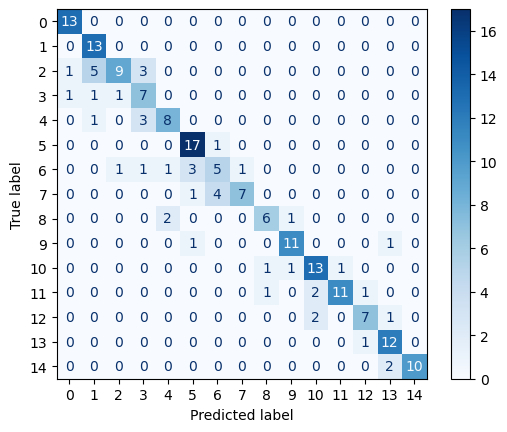

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
#вывести метрики accuracy, f1-score, PR и ROC кривые, PR и ROC AUC, матрицу ошибок
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay.from_estimator(
        grid_search,
        X_test,
        y_test,
        display_labels=target_names,
        cmap=plt.cm.Blues)

print(disp.confusion_matrix)

plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93        13
           1       0.65      1.00      0.79        13
           2       0.82      0.50      0.62        18
           3       0.50      0.70      0.58        10
           4       0.73      0.67      0.70        12
           5       0.77      0.94      0.85        18
           6       0.50      0.42      0.45        12
           7       0.88      0.58      0.70        12
           8       0.75      0.67      0.71         9
           9       0.85      0.85      0.85        13
          10       0.76      0.81      0.79        16
          11       0.92      0.73      0.81        15
          12       0.78      0.70      0.74        10
          13       0.75      0.92      0.83        13
          14       1.00      0.83      0.91        12

    accuracy                           0.76       196
   macro avg       0.77      0.76      0.75       196
weighted avg       0.77   

AUC PR:  0.9078798185941044


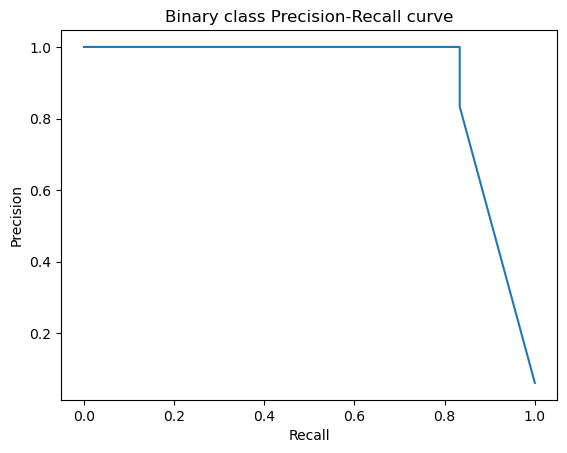

AUC ROC:  0.9157608695652174


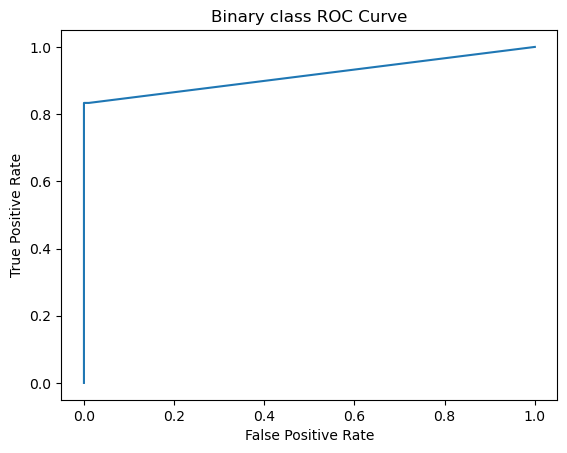

In [ ]:
y_test_bin = label_binarize(y_test, classes=target_names)
f1 = []
for j in range(len(target_names)):
  precision, recall, porog = precision_recall_curve(y_test_bin[:,j],grid_search.predict_proba(X_test)[:,j])
  f1.append([])
  for i in range(len(precision)):
    f1[j].append(2*(precision[i]*recall[i])/(precision[i]+recall[i]))
f1.append(porog)
f1
auc_precision_recall = auc(recall, precision)
print('AUC PR: ',auc_precision_recall)
plt.plot(recall, precision)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Binary class Precision-Recall curve')
plt.show()

y_test_bin = label_binarize(y_test, classes=target_names)
g_mean = []
for j in range(len(target_names)):
  fpr, tpr, thresholds = roc_curve(y_test_bin[:,j],grid_search.predict_proba(X_test)[:,j])
  g_mean.append([])
  for i in range(len(fpr)):
    g_mean[j].append((tpr*(1-fpr))**0.5)
g_mean.append(thresholds)
g_mean
auc_roc = auc(fpr, tpr)
print('AUC ROC: ',auc_roc)
plt.plot(fpr, tpr)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Binary class ROC Curve')
plt.show()


# SVM

In [ ]:
from sklearn.svm import SVC



 Kernel : linear
              precision    recall  f1-score   support

           0       0.86      0.92      0.89        13
           1       0.62      1.00      0.76        13
           2       1.00      0.06      0.11        18
           3       0.32      0.80      0.46        10
           4       0.64      0.58      0.61        12
           5       0.77      0.94      0.85        18
           6       0.33      0.42      0.37        12
           7       0.50      0.08      0.14        12
           8       0.67      0.67      0.67         9
           9       0.92      0.85      0.88        13
          10       0.81      0.81      0.81        16
          11       0.80      0.27      0.40        15
          12       0.29      0.70      0.41        10
          13       0.25      0.08      0.12        13
          14       0.60      0.75      0.67        12

    accuracy                           0.59       196
   macro avg       0.63      0.60      0.54       196
weighte

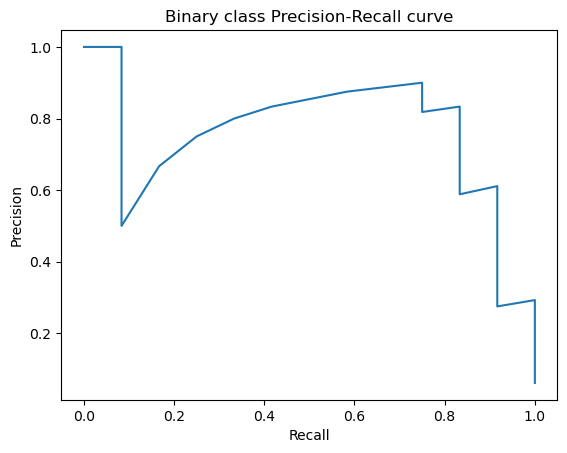

AUC ROC:  0.9791666666666667


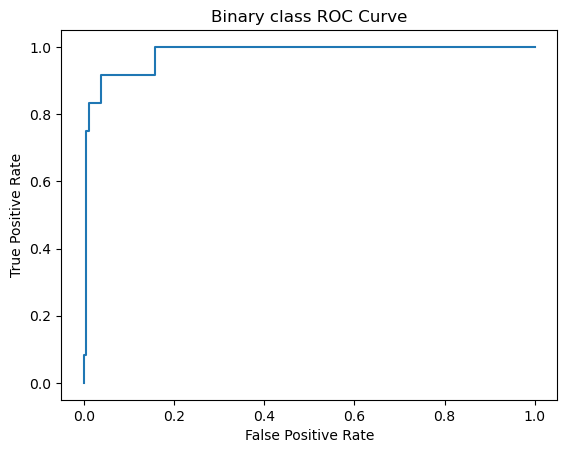



 Kernel : rbf
              precision    recall  f1-score   support

           0       0.86      0.92      0.89        13
           1       0.62      1.00      0.76        13
           2       0.86      0.33      0.48        18
           3       0.37      0.70      0.48        10
           4       0.58      0.58      0.58        12
           5       0.85      0.94      0.89        18
           6       0.50      0.42      0.45        12
           7       0.88      0.58      0.70        12
           8       0.75      0.67      0.71         9
           9       0.85      0.85      0.85        13
          10       0.81      0.81      0.81        16
          11       0.80      0.27      0.40        15
          12       0.30      0.70      0.42        10
          13       0.25      0.08      0.12        13
          14       0.69      0.92      0.79        12

    accuracy                           0.65       196
   macro avg       0.66      0.65      0.62       196
weighted a

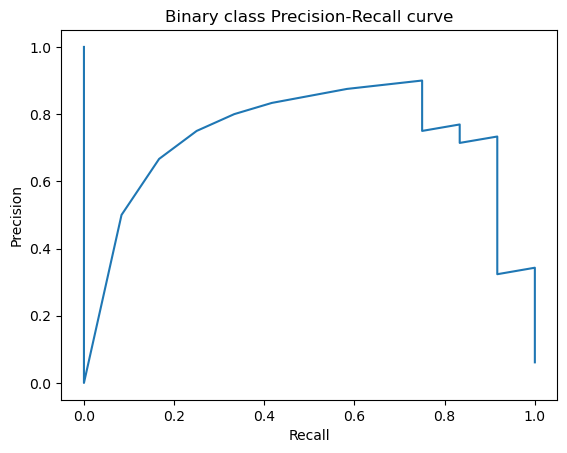

AUC ROC:  0.9823369565217391


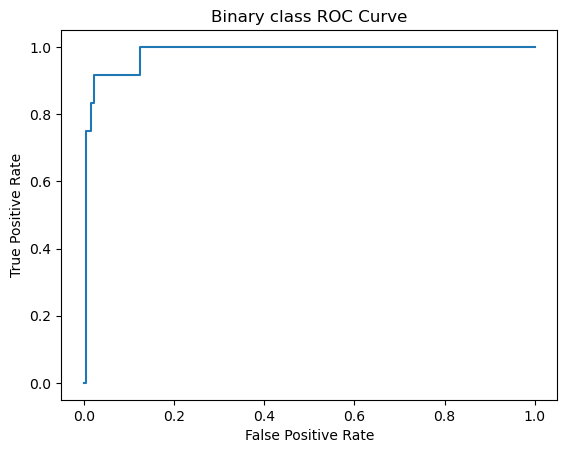



 Kernel : poly
              precision    recall  f1-score   support

           0       0.86      0.92      0.89        13
           1       0.62      1.00      0.76        13
           2       0.79      0.61      0.69        18
           3       0.55      0.60      0.57        10
           4       0.44      0.33      0.38        12
           5       0.50      0.22      0.31        18
           6       0.22      0.58      0.32        12
           7       0.50      0.08      0.14        12
           8       0.60      0.67      0.63         9
           9       0.91      0.77      0.83        13
          10       0.82      0.88      0.85        16
          11       1.00      0.27      0.42        15
          12       0.27      0.80      0.40        10
          13       1.00      0.08      0.14        13
          14       0.75      0.75      0.75        12

    accuracy                           0.56       196
   macro avg       0.65      0.57      0.54       196
weighted 

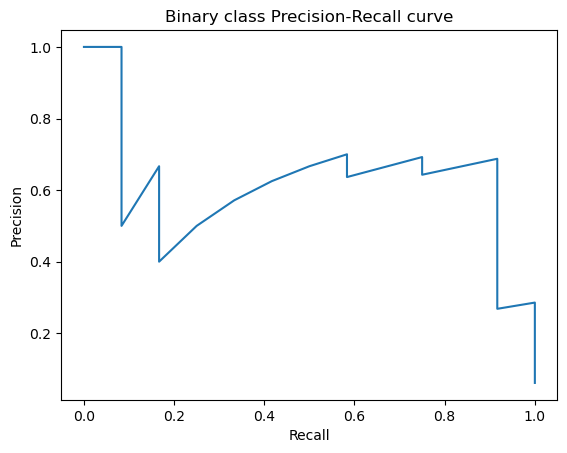

AUC ROC:  0.9710144927536232


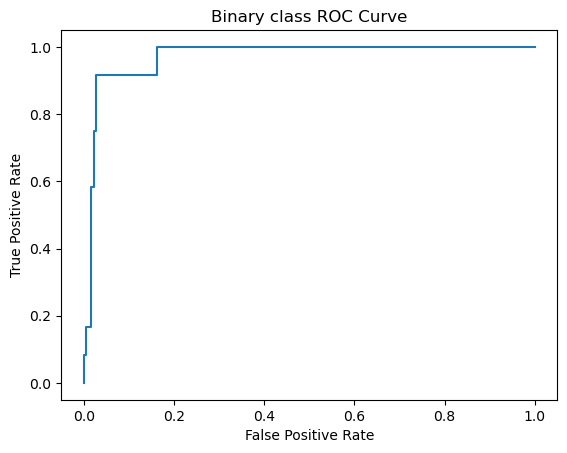



 Kernel : sigmoid
              precision    recall  f1-score   support

           0       0.75      0.69      0.72        13
           1       0.55      0.92      0.69        13
           2       0.00      0.00      0.00        18
           3       0.14      0.10      0.12        10
           4       0.26      0.92      0.41        12
           5       1.00      0.50      0.67        18
           6       0.50      0.33      0.40        12
           7       0.60      0.25      0.35        12
           8       0.43      0.67      0.52         9
           9       0.39      0.85      0.54        13
          10       0.00      0.00      0.00        16
          11       0.00      0.00      0.00        15
          12       0.21      0.70      0.32        10
          13       0.00      0.00      0.00        13
          14       0.69      0.75      0.72        12

    accuracy                           0.42       196
   macro avg       0.37      0.45      0.36       196
weight

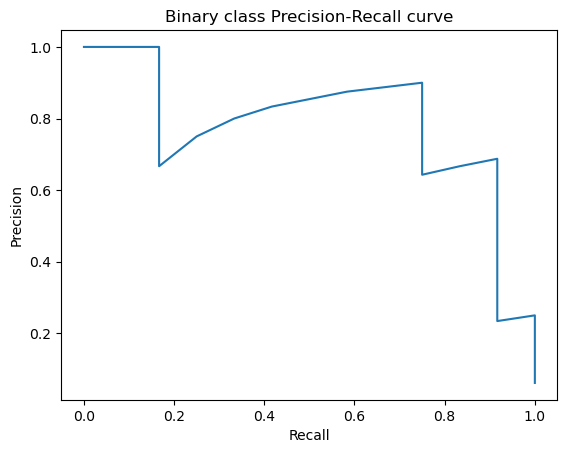

AUC ROC:  0.9759963768115942


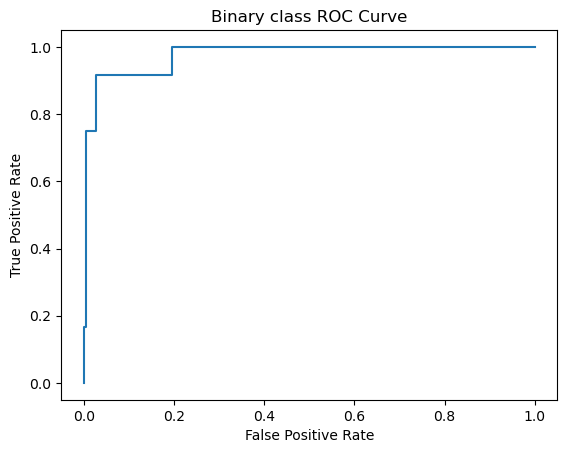

In [ ]:
#использовать SVM для решения задачи классификации
param_kernel = ('linear', 'rbf', "poly", "sigmoid") # ядра

#аналогично как и для KNN, найти оптимальное ядро
#вывести метрики

for i in param_kernel:
    model = SVC(kernel=i, probability=True)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print('\n\n Kernel :', i)
    print(classification_report(y_test, y_pred))

    y_test_bin = label_binarize(y_test, classes=target_names)
    f1 = []
    for j in range(len(target_names)):
      precision, recall, porog = precision_recall_curve(y_test_bin[:,j],model.predict_proba(X_test)[:,j])
      f1.append([])
      for i in range(len(precision)):
        f1[j].append(2*(precision[i]*recall[i])/(precision[i]+recall[i]))
    f1.append(porog)

    auc_precision_recall = auc(recall, precision)
    print('AUC PR: ',auc_precision_recall)
    plt.plot(recall, precision)

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Binary class Precision-Recall curve')
    plt.show()

    y_test_bin = label_binarize(y_test, classes=target_names)
    g_mean = []
    for j in range(len(target_names)):
      fpr, tpr, thresholds = roc_curve(y_test_bin[:,j],model.predict_proba(X_test)[:,j])
      g_mean.append([])
      for i in range(len(fpr)):
        g_mean[j].append((tpr*(1-fpr))**0.5)
    g_mean.append(thresholds)

    auc_roc = auc(fpr, tpr)
    print('AUC ROC: ',auc_roc)
    plt.plot(fpr, tpr)

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Binary class ROC Curve')
    plt.show()

